In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy.stats import pearsonr

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post
from utils.plotting_utils import plots

In [2]:
multi = pd.read_excel("../../../data_exploration/acl/tag_stats/multiwords.xlsx")

In [3]:
multi["multiwords"] = np.any(multi.iloc[:, 1:] > 0, axis=1)

In [4]:
multi

,language,train,train (%),dev,dev (%),test,test (%),multiwords
0,German,0.0,0.000000,0.0,0.000000,0,0.000000,False
1,Spanish,1528.0,0.342490,175.0,0.333264,184,0.348478,True
2,Slovak,0.0,0.000000,0.0,0.000000,0,0.000000,False
3,Norwegian,0.0,0.000000,0.0,0.000000,0,0.000000,False
4,Greek,1114.0,2.564457,304.0,2.828696,250,2.288958,True
5,Chinese,0.0,0.000000,0.0,0.000000,0,0.000000,False
6,Vietnamese,0.0,0.000000,0.0,0.000000,0,0.000000,False
7,Thai,NaN,NaN,NaN,NaN,0,0.000000,False
8,Cantonese,NaN,NaN,NaN,NaN,0,0.000000,False
9,Indonesian,0.0,0.000000,0.0,0.000000,0,0.000000,False


In [5]:
task = "pos"
short_model_name = "mbert"
metric = "Accuracy"

params = {
    "results_dir": "../../../results/",
    "experiment": "acl",
    "short_model_name": short_model_name,
    "task": task,
    "metric": metric
}

M = post.Metrics(**params)
df = M.transfer_loss()
df[["Within-Score", "Cross-Score", "Transfer-Loss"]] *= 100

In [6]:
df

,Train-Group,Train-Language,Within-Score,Test-Group,Test-Language,Cross-Score,Transfer-Loss
0,Fusional,German,98.244598,Fusional,Spanish,84.475673,13.768925
1,Fusional,German,98.244598,Fusional,Slovak,82.929076,15.315522
2,Fusional,German,98.244598,Fusional,Norwegian,87.385704,10.858894
3,Fusional,German,98.244598,Fusional,Greek,80.445224,17.799373
4,Fusional,German,98.244598,Isolating,Chinese,51.415251,46.829346
...,...,...,...,...,...,...,...
301,Introflexive,Maltese,92.937777,Agglutinative,Japanese,36.090226,56.847551
302,Introflexive,Maltese,92.937777,Agglutinative,Turkish,57.860347,35.077429
303,Introflexive,Maltese,92.937777,Introflexive,Arabic,51.951404,40.986372
304,Introflexive,Maltese,92.937777,Introflexive,Hebrew,52.903482,40.034295


In [7]:
df = pd.merge(df, multi[["language", "train (%)"]], how="left", left_on="Train-Language", right_on="language")
df = df.drop("language", axis=1)
df = df.rename(columns={"train (%)": "Train-Multiwords-Percent"})

In [8]:
df = pd.merge(df, multi[["language", "test (%)", "multiwords"]], how="left", left_on="Test-Language", right_on="language")
df = df.drop("language", axis=1)
df = df.rename(columns={"test (%)": "Test-Multiwords-Percent", "multiwords": "Test-Multiwords"})
df["Multiwords-Diff"] = df["Test-Multiwords-Percent"] - df["Train-Multiwords-Percent"]

In [9]:
df

,Train-Group,Train-Language,Within-Score,Test-Group,Test-Language,Cross-Score,Transfer-Loss,Train-Multiwords-Percent,Test-Multiwords-Percent,Test-Multiwords,Multiwords-Diff
0,Fusional,German,98.244598,Fusional,Spanish,84.475673,13.768925,0.0,0.348478,True,0.348478
1,Fusional,German,98.244598,Fusional,Slovak,82.929076,15.315522,0.0,0.000000,False,0.000000
2,Fusional,German,98.244598,Fusional,Norwegian,87.385704,10.858894,0.0,0.000000,False,0.000000
3,Fusional,German,98.244598,Fusional,Greek,80.445224,17.799373,0.0,2.288958,True,2.288958
4,Fusional,German,98.244598,Isolating,Chinese,51.415251,46.829346,0.0,0.000000,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
301,Introflexive,Maltese,92.937777,Agglutinative,Japanese,36.090226,56.847551,0.0,0.000000,False,0.000000
302,Introflexive,Maltese,92.937777,Agglutinative,Turkish,57.860347,35.077429,0.0,2.194266,True,2.194266
303,Introflexive,Maltese,92.937777,Introflexive,Arabic,51.951404,40.986372,0.0,12.037844,True,12.037844
304,Introflexive,Maltese,92.937777,Introflexive,Hebrew,52.903482,40.034295,0.0,18.847856,True,18.847856


(-0.11603368644475093, 0.042528672495894496)


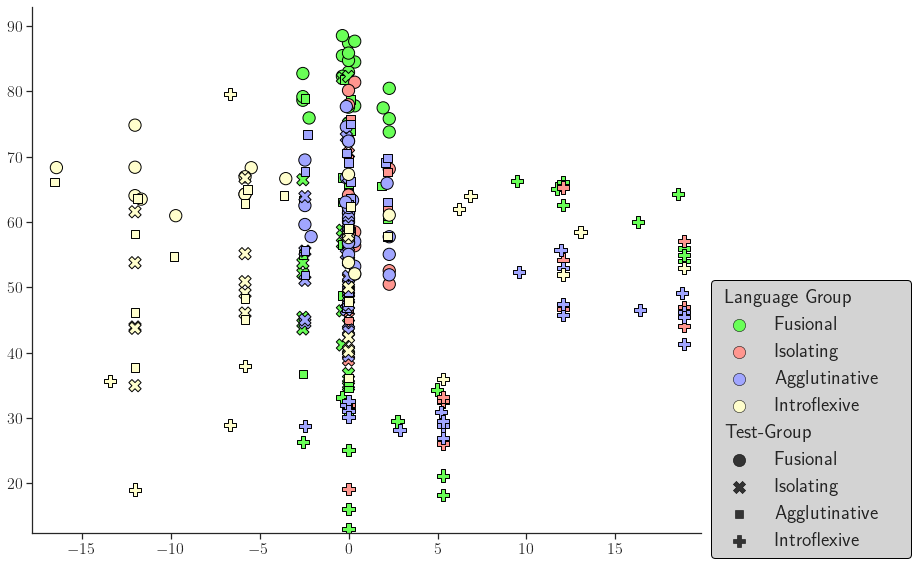

In [10]:
plots.scatter(x="Multiwords-Diff",
              y="Cross-Score",
              data=df,
              kind="relplot",
              style="Test-Group",
              remove_labels=True)

print(pearsonr(x=df["Multiwords-Diff"], y=df["Cross-Score"]))

In [11]:
import statsmodels.api as sm

In [12]:
X = df[["Train-Multiwords-Percent", "Test-Multiwords-Percent"]].values
y = df["Cross-Score"].values
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)

In [13]:
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.140
Date:                Wed, 20 Jan 2021   Prob (F-statistic):              0.119
Time:                        09:24:04   Log-Likelihood:                -1259.4
No. Observations:                 306   AIC:                             2525.
Df Residuals:                     303   BIC:                             2536.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.2046      1.030     54.571      0.0

In [14]:
task = "pos"
short_model_name = "xlm-roberta"
metric = "Accuracy"

params = {
    "results_dir": "../../../results/",
    "experiment": "acl",
    "short_model_name": short_model_name,
    "task": task,
    "metric": metric
}

M = post.Metrics(**params)
df = M.transfer_loss()
df[["Within-Score", "Cross-Score", "Transfer-Loss"]] *= 100

In [15]:
df = pd.merge(df, multi[["language", "train (%)"]], how="left", left_on="Train-Language", right_on="language")
df = df.drop("language", axis=1)
df = df.rename(columns={"train (%)": "Train-Multiwords-Percent"})

In [16]:
df = pd.merge(df, multi[["language", "test (%)", "multiwords"]], how="left", left_on="Test-Language", right_on="language")
df = df.drop("language", axis=1)
df = df.rename(columns={"test (%)": "Test-Multiwords-Percent", "multiwords": "Test-Multiwords"})
df["Multiwords-Diff"] = df["Test-Multiwords-Percent"] - df["Train-Multiwords-Percent"]

(-0.15408470569039395, 0.006923618388574604)


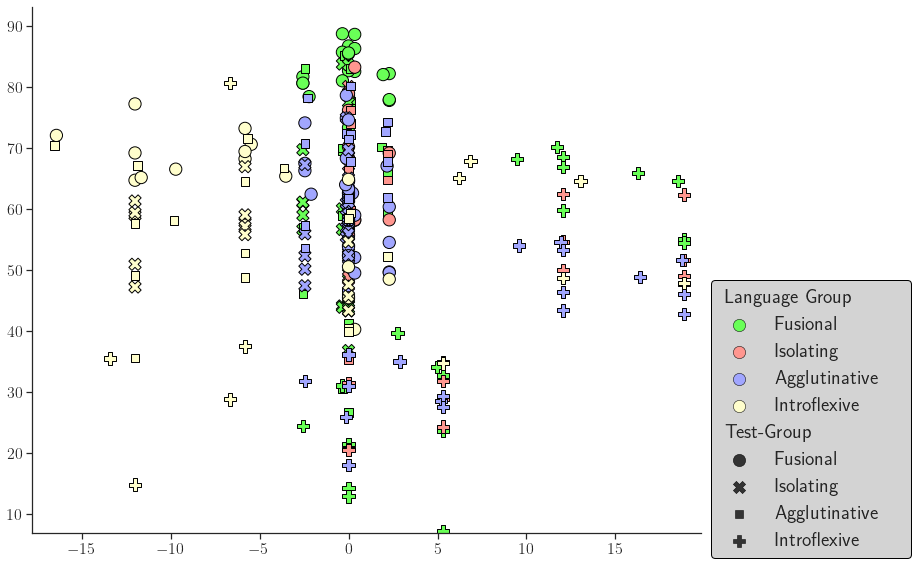

In [19]:
plots.scatter(x="Multiwords-Diff",
              y="Cross-Score",
              data=df,
              kind="relplot",
              style="Test-Group",
              remove_labels=True)

print(pearsonr(x=df["Multiwords-Diff"], y=df["Cross-Score"]))

In [17]:
X = df[["Train-Multiwords-Percent", "Test-Multiwords-Percent"]].values
y = df["Cross-Score"].values
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)

In [18]:
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.726
Date:                Wed, 20 Jan 2021   Prob (F-statistic):             0.0252
Time:                        09:25:02   Log-Likelihood:                -1273.4
No. Observations:                 306   AIC:                             2553.
Df Residuals:                     303   BIC:                             2564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.5060      1.078     54.263      0.0